In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9 * 0.9)
plt.rcParams.update({'font.size': 14})

COLOR = 'black'
plt.rcParams['text.color'] = COLOR
plt.rcParams['axes.labelcolor'] = COLOR
plt.rcParams['xtick.color'] = COLOR
plt.rcParams['ytick.color'] = COLOR

plt.rcParams['savefig.dpi'] = 300

# plt.style.use('default')

In [2]:
import nbimporter
import functions as F

In [3]:
dfs = {
    'dqn': None,
    'expl': None,
    'height': None
}

root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/dqn_9_1_k_trained_40_sess/'
file_name = 'test_non_agnostic_logs2021-09-07.21:44:01.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)
df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})
df = df.loc[df['run'] <= 30]

dfs['dqn'] = df

dfs['dqn'].tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
560,560,27,30,5,4,-0.004272,0.584926,0.211262,0.026089
561,561,28,30,5,4,-0.016084,0.568841,0.145264,0.029402
562,562,29,30,5,4,0.009919,0.578760,0.186096,0.004003
563,563,30,30,5,3,-0.243706,0.335054,-5.786657,5.568752
564,564,0,30,5,4,0.246817,0.581872,6.223717,5.435347


In [4]:
root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/expl_100_30_sess/'
file_name = 'test_non_agnostic_logs2021-09-08.07:31:59.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)
df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})
df = df.loc[df['run'] <= 30]

dfs['expl'] = df

dfs['expl'].tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
616,616,2,30,5,2,0.245998,0.030793,7.239436,5.346704
617,617,3,30,5,3,0.278464,0.309257,8.818751,7.141357
618,618,4,30,5,4,0.245657,0.554915,7.083081,5.171128
619,619,5,30,5,3,-0.246805,0.308110,-5.070130,5.818213
620,620,0,30,5,5,0.523497,0.831607,28.420273,26.466442


In [5]:
root = '/home/raul/Documents/ROBOTS/evaluator-push-to-see/height_first_30_sess/'
file_name = 'test_non_agnostic_logs2021-09-08.15:45:31.txt'

df = pd.read_csv(root + file_name)
df = df.fillna(0)
df = df.astype({'iteration': 'int32', 'session': 'int32', 'obj_found': 'int32', 'obj_init': 'int32', 'run': 'int32'})
df = df.loc[df['run'] <= 30]

dfs['height'] = df

dfs['height'].tail()

,iteration,session,run,obj_init,obj_found,diff_seg_reward,current_seg_reward,expected_reward,loss
576,576,21,30,5,4,-0.009779,0.570657,0.175212,0.0
577,577,22,30,5,4,-0.002534,0.568123,0.240849,0.0
578,578,23,30,5,4,0.003253,0.571375,0.205445,0.0
579,579,24,30,5,4,0.004580,0.575956,0.211283,0.0
580,580,0,30,5,5,0.269200,0.845155,7.476549,0.0


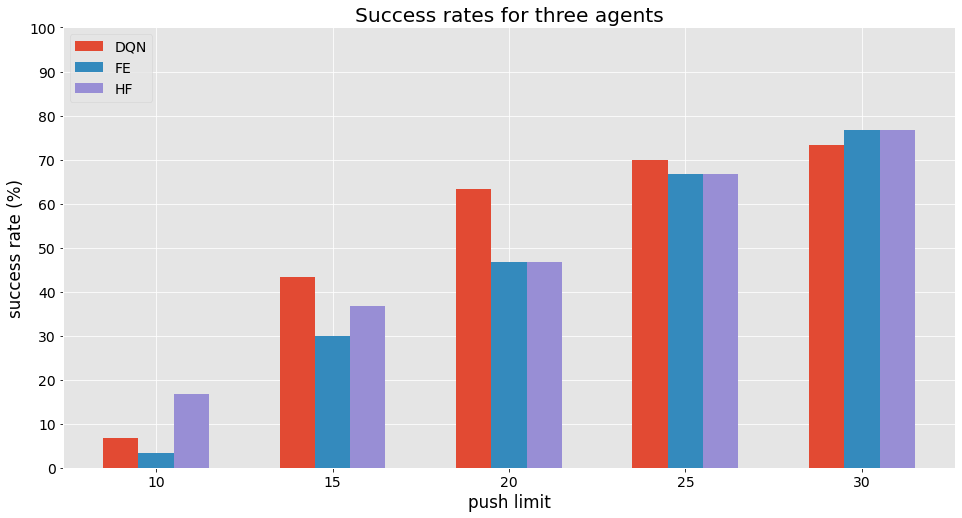

In [6]:
def plot_success_rate_baselines(dfs, success_thrs):

    x = np.array(success_thrs)

    fig, ax = plt.subplots()
    width = 1
    
    frames = [[], [], []]
    
    for t in success_thrs:
        dqn = F.success_rate(dfs['dqn'], t)
        frames[0].append(dqn)
        
        expl = F.success_rate(dfs['expl'], t)
        frames[1].append(expl)
        
        height = F.success_rate(dfs['height'], t)
        frames[2].append(height)
        
    frames = np.array(frames)
    
    ax.bar(x - width, frames[0] * 100, width, label='DQN')
    ax.bar(x, frames[1] * 100, width, label='FE')
    ax.bar(x + width, frames[2] * 100, width, label='HF')

    ax.set_xlabel('push limit')
    ax.set_ylabel('success rate (%)')
    
    ax.set_title(f'Success rates for three agents')
    
    ax.set_xticks(success_thrs)
    ax.set_yticks(list(range(0, 110, 10)))
    
    ax.legend(loc='upper left')
    
plot_success_rate_baselines(dfs, [10, 15, 20, 25, 30])

plt.savefig('/home/raul/Documents/ROBOTS/evaluator-push-to-see/diss_img/success_rates_three_agents')

In [33]:
def target_found_per_successful_session(df, success_thr):
    return df \
            .groupby(df['run'])\
            .filter(lambda x: F.is_successful(x, success_thr)) \
            .groupby(df['session']) \
            .count()
#             .sort_values(ascending=True) \
#             .reset_index()

temp = target_found_per_successful_session(dfs['height'], THR)

print(temp)

def plot_targets_found_per_session_iteration(df, success_thr):
    found = target_found_per_successful_session(df, success_thr)
    
    print(found)
    
    fig, ax = plt.subplots()

    ax.bar(found.index, found['obj_found'])
    ax.hlines(F.target_init_avg(df), found.index[0], found.index[-1], linestyles='dashed', colors='gray', label='initial targets')

    ax.set_xlabel('session iteration')
    ax.set_ylabel('visible targets')
    
    ax.set_title(f'Average number of visible targets')
    
    ax.set_xticks(list(range(0, found.index[-1] + 1)))
    ax.set_yticks(list(range(6)))
    
THR = 30
    
# plot_targets_found_per_session_iteration(dfs['height'], THR)

# plt.savefig('/home/raul/Documents/ROBOTS/evaluator-push-to-see/diss_img/height_found_targets')

# sr = F.success_rate(dfs['height'],THR)
# print(sr)


         iteration  session  run  obj_init  obj_found  diff_seg_reward  \
session                                                                  
0               23       23   23        23         23               23   
1               23       23   23        23         23               23   
2               23       23   23        23         23               23   
3               23       23   23        23         23               23   
4               23       23   23        23         23               23   
5               23       23   23        23         23               23   
6               23       23   23        23         23               23   
7               22       22   22        22         22               22   
8               19       19   19        19         19               19   
9               18       18   18        18         18               18   
10              16       16   16        16         16               16   
11              16       16   16      

0.7333333333333333


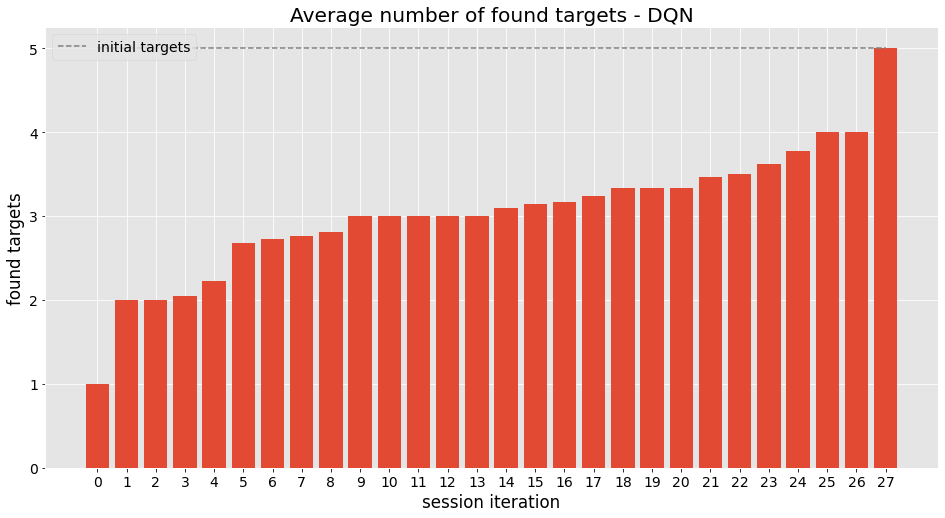

In [8]:
F.plot_targets_found_per_session_iteration(dfs['dqn'], THR, f'Average number of found targets - DQN')

plt.savefig('/home/raul/Documents/ROBOTS/evaluator-push-to-see/diss_img/dqn_found_targets')

sr = F.success_rate(dfs['dqn'],THR)
print(sr)

0.7666666666666667


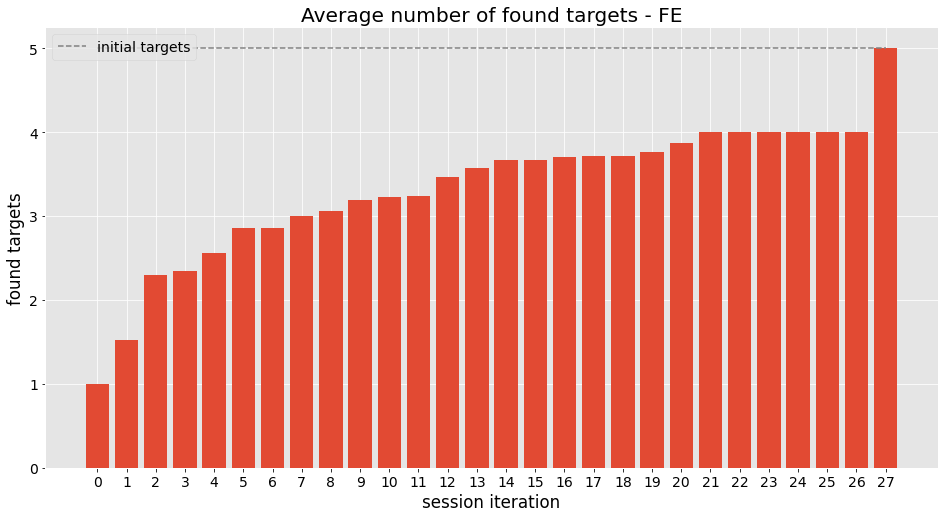

In [9]:
F.plot_targets_found_per_session_iteration(dfs['expl'], THR, f'Average number of found targets - FE')

plt.savefig('/home/raul/Documents/ROBOTS/evaluator-push-to-see/diss_img/expl_found_targets')

sr = F.success_rate(dfs['expl'], THR)
print(sr)